### Loading the dataset and extracting information

In [3]:
#Import all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
#Load the dataset
review_df = pd.read_csv("rt.reviews.tsv", delimiter="\t", encoding = 'latin1')
review_df

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"


*-We will go ahead and check the first five and the last five rows of the dataset, just to be familiar with what we are working with.*

In [5]:
#Check the first five rows of the dataset
review_df.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [6]:
#Check the last five rows of the dataset
review_df.tail()

,id,review,rating,fresh,critic,top_critic,publisher,date
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"
54431,2000,NaN,3/5,fresh,Nicolas Lacroix,0,Showbizz.net,"November 12, 2002"


*Next, we check the shape of the dataset so that we can see how many total rows and columns we have.*

In [7]:
#Checking the shape of the dataset
review_df.shape

(54432, 8)

*We will then check the information on the dataset, which will help us to know the total number of records and columns, the names of the columns, the datatypes in each column, and also if a column has missing values.*

In [8]:
#Checking the dataset information
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


*We are going to get the summary statistics of the categorical column so that we can see the number of unique values in each column and also get the value that appears the most in a column, and how many times it appears.*

In [9]:
#Describe the categorical columns
review_df.describe(include="O")

,review,rating,fresh,critic,publisher,date
count,48869,40915,54432,51710,54123,54432
unique,48682,186,2,3496,1281,5963
top,Parental Content Review,3/5,fresh,Emanuel Levy,eFilmCritic.com,"January 1, 2000"
freq,24,4327,33035,595,673,4303


*Before we start data cleaning, we are going to make a copy of our original dataset so that we can work on our copy and not lose the original data, in case we need it.*

In [10]:
#Making a copy of the original dataframe
review_df1 = review_df.copy(deep=True)

*We will then load our dataset so that we can begin to work on it.*

In [11]:
#Loading the dataset
review_df1 = pd.read_csv("rt.reviews.tsv", delimiter="\t", encoding = 'latin1')
review_df1.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


*The column names are already standardized and in the right format which will make them easier to work with, so we don't need to redo that step. We will then check if there are any duplicated rows, and remove if there are any so that the dataset is clean.*

In [12]:
#Check if there are any duplicated rows
duplicated_rows = review_df1[review_df.duplicated()]
duplicated_rows

,id,review,rating,fresh,critic,top_critic,publisher,date
8129,304,"Friends With Kids is a smart, witty and potty-...",NaN,fresh,NaN,0,Liverpool Echo,"June 29, 2012"
14575,581,NaN,4.5/5,fresh,NaN,0,Film Threat,"December 6, 2005"
26226,1055,NaN,4/5,fresh,NaN,0,Film Threat,"December 6, 2005"
35162,1368,NaN,2/5,rotten,NaN,0,Film Threat,"December 6, 2005"
35166,1368,NaN,2/5,rotten,NaN,0,Film Threat,"December 8, 2002"
40567,1535,NaN,2/5,rotten,NaN,0,Film Threat,"December 6, 2005"
42381,1598,"This tired, neutered action thriller won't cau...",2/5,rotten,NaN,0,Empire Magazine,"November 14, 2008"
49487,1843,NaN,0.5/5,rotten,NaN,0,Film Threat,"December 6, 2005"
49492,1843,NaN,0.5/5,rotten,NaN,0,Film Threat,"December 8, 2002"


*From the above, we see that our dataset has 9 duplicated rows, so we will go ahead and remove them using the drop_duplicates method.*

In [13]:
#Drop the duplicated rows
review_df1 = review_df1.drop_duplicates()

#Confirm whether there are still any duplicates even after cleaning
review_df1.duplicated().sum()

0

*Next, we will check if there are any missing values in any of the columns, together with the data types and the unique values of each column. This helps us to know how best we will clean the dataset, what to change and what not to.*

In [14]:
#Checking for any missing values
data_dict = pd.DataFrame({"ColumnName": review_df1.columns,
                           "DataType": review_df1.dtypes,
                           "MissingValues": review_df1.isnull().sum(),
                           "UniqueValues": review_df1.nunique()})
data_dict

,ColumnName,DataType,MissingValues,UniqueValues
id,id,int64,0,1135
review,review,object,5556,48682
rating,rating,object,13516,186
fresh,fresh,object,0,2
critic,critic,object,2713,3496
top_critic,top_critic,int64,0,2
publisher,publisher,object,309,1281
date,date,object,0,5963


*Since the date has an 'object' datatype, we are going to convert it to datetime datatype so that we can use powerful time-based features that might help us when we are trying to sort, filter, or group by dates.*

In [15]:
#Convert the data type of the 'date' column
review_df1.loc[:,'date'] = pd.to_datetime(review_df1['date'], errors='coerce')
review_df1.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,2018-11-10 00:00:00
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,2018-05-23 00:00:00
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,2018-01-04 00:00:00
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,2017-11-16 00:00:00
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,2017-10-12 00:00:00


*Since there are some null values in some of the categorical columns, after carefully examining the columns, we have decided to fill the null values with "Unknown" in order to avoid bias, because using the mode might skew the data toward the most frequent category, which may not reflect reality, and to also prevent misleading analysis.* 

In [16]:
#Filling the null values in the categorical columns
review_df1['review'] = review_df1['review'].fillna('').astype(str)
review_df1['critic'] = review_df1['critic'].fillna('Unknown').astype(str)
review_df1['publisher'] = review_df1['publisher'].fillna('Unknown').astype(str)

We are going to counter check the dataset again to see if there are any null values in the categorical columns even after we have cleaned those columns, just to be sure and to avoid any issues later on.

In [17]:
#Checking for any missing values after filling null values in the categorical columns
data_dict = pd.DataFrame({"ColumnName": review_df1.columns,
                           "DataType": review_df1.dtypes,
                           "MissingValues": review_df1.isnull().sum(),
                           "UniqueValues": review_df1.nunique()})
data_dict

,ColumnName,DataType,MissingValues,UniqueValues
id,id,int64,0,1135
review,review,object,0,48683
rating,rating,object,13516,186
fresh,fresh,object,0,2
critic,critic,object,0,3497
top_critic,top_critic,int64,0,2
publisher,publisher,object,0,1282
date,date,object,0,5963


*Since we still have some null values in the 'rating' column, we are going to deal with that. We are going to check the unique values for the 'rating' column so that we know what we are working with, and how we are going to clean the missing values in that column, and other values in the column in general.*

In [18]:
# check number of unique values in the 'rating' column
unique_ratings = review_df1['rating'].unique()
unique_ratings

array(['3/5', nan, 'C', '2/5', 'B-', '2/4', 'B', '3/4', '4/5', '4/4',
       '6/10', '1/4', '8', '2.5/4', '4/10', '2.0/5', '3/10', '7/10', 'A-',
       '5/5', 'F', '3.5/4', 'D+', '1.5/4', '3.5/5', '8/10', 'B+', '9/10',
       '2.5/5', '7.5/10', '5.5/10', 'C-', '1.5/5', '1/5', '5/10', 'C+',
       '0/5', '6', '0.5/4', 'D', '3.1/5', '3/6', '4.5/5', '0/4', '2/10',
       'D-', '7', '1/10', '3', 'A+', 'A', '4.0/4', '9.5/10', '2.5',
       '2.1/2', '6.5/10', '3.7/5', '8.4/10', '9', '1', '7.2/10', '2.2/5',
       '0.5/10', '5', '0', '2', '4.5', '7.7', '5.0/5', '8.5/10', '3.0/5',
       '0.5/5', '1.5/10', '3.0/4', '2.3/10', '4.5/10', '4/6', '3.5',
       '8.6/10', '6/8', '2.0/4', '2.7', '4.2/10', '5.8', '4', '7.1/10',
       '5/4', 'N', '3.5/10', '5.8/10', 'R', '4.0/5', '0/10', '5.0/10',
       '5.9/10', '2.4/5', '1.9/5', '4.9', '7.4/10', '1.5', '2.3/4',
       '8.8/10', '4.0/10', '2.2', '3.8/10', '6.8/10', '7.3', '7.0/10',
       '3.2', '4.2', '8.4', '5.5/5', '6.3/10', '7.6/10', '8.1/10',
  


*From the above, we can see that the values in the rating column are not consistent. Some are written as fractions like 3/5, others are whole numbers like 7 or 8.5, and a few are non-numeric like A+ and T.*

*Because of this, we need to clean and standardize them so we can compare all the ratings fairly. We converted all fractional ratings into a normalized scale between 0 and 1, by dividing them, then scaled those to a 0–10 range for uniformity.* 

*Ratings that couldn't be interpreted such as letter grades or any unclear entries were set to null. This normalization allowed us to create a clean and reliable rating_10_point column, making it easier to compare and visualize movie reviews across different sources.*

In [19]:
#Standardizing the different rating formats into a consistent 0–10 scale
def normalize_rating(rating):
    try:
        if pd.isna(rating):
            return np.nan
        
        if '/' in str(rating):
            num, denom = map(float, rating.split('/'))
            return num / denom
        else:
            return float(rating)
    
    except:
        return np.nan 
        
review_df1 = review_df1.copy()
review_df1.loc[:, 'rating_normalized'] = review_df1['rating'].apply(normalize_rating)

# Convert 'rating_normalized' to numeric
review_df1['rating_normalized'] = pd.to_numeric(review_df1['rating_normalized'], errors ='coerce') 

# Convert normalized (0-1) ratings to 0-10 scale
review_df1.loc[:, 'rating_10_point'] = review_df1['rating_normalized'].apply(
        lambda x: x * 10 if isinstance(x, float) and 0<= x <= 1 else x)

#Check our dataframe after normalization
review_df1

,id,review,rating,fresh,critic,top_critic,publisher,date,rating_normalized,rating_10_point
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,2018-11-10 00:00:00,0.6,6.0
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,2018-05-23 00:00:00,NaN,NaN
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,2018-01-04 00:00:00,NaN,NaN
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,2017-11-16 00:00:00,NaN,NaN
4,3,... a perverse twist on neorealism...,NaN,fresh,Unknown,0,Cinema Scope,2017-10-12 00:00:00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,2002-09-24 00:00:00,NaN,NaN
54428,2000,,1/5,rotten,Michael Szymanski,0,Zap2it.com,2005-09-21 00:00:00,0.2,2.0
54429,2000,,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,2005-07-17 00:00:00,0.4,4.0
54430,2000,,2.5/5,rotten,Christopher Null,0,Filmcritic.com,2003-09-07 00:00:00,0.5,5.0


*Since the rating_normalized column was only an intermediate step used to calculate the final rating_10_point values, we can now drop it to keep the dataset clean and avoid redundancy.*

In [20]:
#Drop the 'rating_normalized' column
review_df1.drop(columns=['rating_normalized'], inplace=True)

In [21]:
#Checking the dataset information after standardization to check for any null values
data_dict = pd.DataFrame({"ColumnName": review_df1.columns,
                           "DataType": review_df1.dtypes,
                           "MissingValues": review_df1.isnull().sum(),
                           "UniqueValues": review_df1.nunique()})
data_dict

,ColumnName,DataType,MissingValues,UniqueValues
id,id,int64,0,1135
review,review,object,0,48683
rating,rating,object,13516,186
fresh,fresh,object,0,2
critic,critic,object,0,3497
top_critic,top_critic,int64,0,2
publisher,publisher,object,0,1282
date,date,object,0,5963
rating_10_point,rating_10_point,float64,19986,83


*There are null values in the new column 'rating_10_point', and because it is a numeric column, we will first check the distribution of the valid ratings in that column. If the data is highly skewed, we will use the median to avoid distortion and if the distribution is approximately normal, we will fill missing values with the mean of that column.* 

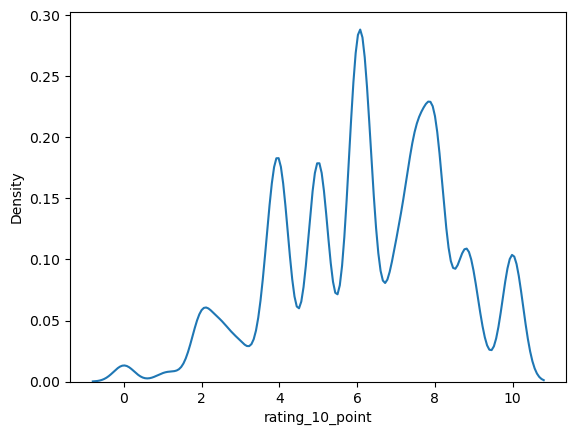

In [22]:
#Checking the distribution of the column
sns.kdeplot(review_df1["rating_10_point"])
plt.show();

*Since the distribution is skewed, we will fill the null values using the median of the column, as the median is more robust to skewed data and outliers than the mean.*

In [23]:
#Filling the missing values in 'rating_10_point' column with median
median_rating_10= review_df1["rating_10_point"].median()
review_df1.fillna({"rating_10_point": median_rating_10}, inplace=True)

In [24]:
#Checking if there are still any null values even after filling them
review_df1["rating_10_point"].isna().sum()

0

*The original 'rating' column contains null values because we filtered out invalid, inconsistent, or non-numeric entries during the cleaning process. Since we have already standardized the ratings into a new, consistent format in the rating_10_point column, we no longer need to rely on the original column for analysis.*

*Therefore, we can choose to leave it as it is for traceability, rename it for reference, or drop it completely if we're confident in the cleaned and normalized ratings; for us we will leave it as it is for now.*

*From our dataset, we observed that many movie IDs are repeated. Since the data contains movie reviews, this repetition likely means that each movie was reviewed by multiple critics.* 

*To confirm this, we grouped the data by the id column and counted the number of rows per ID. This helped us understand how many reviews each movie received and supported our decision to aggregate the data accordingly.*

In [25]:
# Group by 'id' and count the numbers of rows per id
id_counts = review_df1.groupby('id').size().reset_index(name = 'row_count')
id_counts

,id,row_count
0,3,163
1,5,23
2,6,57
3,8,75
4,10,108
...,...,...
1130,1996,143
1131,1997,28
1132,1998,2
1133,1999,46


*Since the 'fresh' column only contained two categories of values, "fresh" and "rotten", we converted the column into a binary format where "fresh" = 1 and "rotten" = 0. This transformation helps simplify categorical data for modeling and numerical analysis.*

In [26]:
#Converting the 'fresh' column to binary
review_df1['fresh'] = review_df1['fresh'].map({'fresh': 1, 'rotten': 0})

#Checking if the values of the column have changed
review_df1['fresh'].unique()

array([1, 0], dtype=int64)

In [27]:
# drop columns
review_df1 = review_df1.drop(['publisher', 'critic'], axis =1)
review_df1

,id,review,rating,fresh,top_critic,date,rating_10_point
0,3,A distinctly gallows take on contemporary fina...,3/5,1,0,2018-11-10 00:00:00,6.00
1,3,It's an allegory in search of a meaning that n...,NaN,0,0,2018-05-23 00:00:00,6.25
2,3,... life lived in a bubble in financial dealin...,NaN,1,0,2018-01-04 00:00:00,6.25
3,3,Continuing along a line introduced in last yea...,NaN,1,0,2017-11-16 00:00:00,6.25
4,3,... a perverse twist on neorealism...,NaN,1,0,2017-10-12 00:00:00,6.25
...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,1,1,2002-09-24 00:00:00,6.25
54428,2000,,1/5,0,0,2005-09-21 00:00:00,2.00
54429,2000,,2/5,0,0,2005-07-17 00:00:00,4.00
54430,2000,,2.5/5,0,0,2003-09-07 00:00:00,5.00


*We are going to aggregate the dataset by movie ID to ensure each movie appears only once in our final dataset. Since movies often receive multiple reviews from different critics, the original data contains many repeated IDs.* 

*Aggregating helps us summarize these multiple reviews into a single row per movie by computing the average rating. This makes the dataset more efficient to analyze, visualize, and model, as it eliminates redundancy while preserving meaningful insights from multiple sources.*

In [46]:
#Aggregating reviews by movie ID to get average rating
df_review_aggregated = review_df1.groupby('id', as_index=False).agg({
    'rating_10_point': 'mean',
    'fresh': lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan,
    'review': ''.join
})
df_review_aggregated['rating_10_point'] = df_aggregated['rating_10_point'].round(1)

df_review_aggregated

,id,rating_10_point,fresh,review
0,3,6.2,1,A distinctly gallows take on contemporary fina...
1,5,6.8,1,This is not the smoothest trip: the transition...
2,6,6.0,1,Though directed with machine-like precision by...
3,8,6.6,1,"Great boy-and-dog tale, but be prepared for te..."
4,10,6.0,0,"It won't stick with you forever, but you will ..."
...,...,...,...,...
1130,1996,6.2,1,"This is a good-looking film, and Jackson is ju..."
1131,1997,5.1,0,It ultimately fails because it lacks sufficien...
1132,1998,6.0,1,Better than average Elvis vehicle.more enterta...
1133,1999,5.9,1,The Sandlot almost does for baseball what A Ch...


## TheMovieDB Dataset

In [31]:
#Loading the dataset
tmdb_df = pd.read_csv("tmdb.movies.csv", index_col=0)
tmdb_df

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...
26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


*We will go ahead and check the first five and the last five rows of the dataset, just to be familiar with what we are working with.*

In [32]:
#Check the first five rows of the dataset
tmdb_df.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [33]:
#Check the last five rows of the dataset
tmdb_df.tail()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
26512,"[27, 18]",488143,en,Laboratory Conditions,0.6,2018-10-13,Laboratory Conditions,0.0,1
26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.6,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,"[14, 28, 12]",381231,en,The Last One,0.6,2018-10-01,The Last One,0.0,1
26515,"[10751, 12, 28]",366854,en,Trailer Made,0.6,2018-06-22,Trailer Made,0.0,1
26516,"[53, 27]",309885,en,The Church,0.6,2018-10-05,The Church,0.0,1


*Next, we check the shape of the dataset so that we can see how many total rows and columns we have.*

In [34]:
#Checking the shape of the dataset
tmdb_df.shape

(26517, 9)

*We shall then get the information on the dataset so that it helps us know the total number of records and columns, the names of the columns, the datatypes in each column, and also if a column has missing values.*

In [35]:
#Checking the dataset information
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


*Summary statistics helps in making mathematical computations such as the mean, mode, median, standard deviation amongst others that might be useful in the long run as you work on the dataset.*

In [36]:
#Checking the summary statistics of the numerical columns 
tmdb_df.describe()

,id,popularity,vote_average,vote_count
count,26517.000000,26517.000000,26517.000000,26517.000000
mean,295050.153260,3.130912,5.991281,194.224837
std,153661.615648,4.355229,1.852946,960.961095
min,27.000000,0.600000,0.000000,1.000000
25%,157851.000000,0.600000,5.000000,2.000000
50%,309581.000000,1.374000,6.000000,5.000000
75%,419542.000000,3.694000,7.000000,28.000000
max,608444.000000,80.773000,10.000000,22186.000000


*We are going to get the summary statistics of the categorical column so that we can see the number of unique values in each column and also get the value that appears the most in a column, and how many times it appears.*

In [37]:
#Describing the categorical columns
tmdb_df.describe(include="O")

,genre_ids,original_language,original_title,release_date,title
count,26517,26517,26517,26517,26517
unique,2477,76,24835,3433,24688
top,[99],en,Eden,2010-01-01,Eden
freq,3700,23291,7,269,7


*We will check and see if there are any present null values in our dataset, so that we can know how to handle them when we approach data cleaning.*

In [38]:
#Checking for any null values
tmdb_df.isna().sum()

genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

*We need to check for unique values in each column of the dataset, and to do this, we are going to use a function to make the process more efficient and reusable, therefore making our work easier instead of repeating the same process over and over.*

*Checking for unique values in the entire dataset helps identify how many distinct entries exist in each column, which is useful for understanding the structure of your data, and most importantly, identifying unexpected or inconsistent entries.*

In [39]:
#Checking for unique values in each column
for col in tmdb_df:
    col_val=tmdb_df[col].unique()
    print(f"{col}: '\n', {col_val}", '\n')

genre_ids: '
', ['[12, 14, 10751]' '[14, 12, 16, 10751]' '[12, 28, 878]' ...
 '[18, 14, 27, 878, 10749, 53]' '[16, 27, 9648]' '[10751, 12, 28]'] 

id: '
', [ 12444  10191  10138 ... 381231 366854 309885] 

original_language: '
', ['en' 'nl' 'es' 'ja' 'sv' 'de' 'fr' 'cn' 'it' 'ru' 'zh' 'hi' 'no' 'ko'
 'da' 'fi' 'pl' 'te' 'hu' 'tr' 'pt' 'he' 'fa' 'th' 'cs' 'et' 'tl' 'lt'
 'xx' 'bs' 'ar' 'is' 'el' 'mr' 'hr' 'ro' 'sr' 'uk' 'nb' 'hz' 'ca' 'bg'
 'sl' 'lv' 'si' 'ab' 'ta' 'bo' 'id' 'sq' 'bn' 'gu' 'lo' 'ne' 'kk' 'hy'
 'ps' 'kn' 'vi' 'ku' 'ka' 'ml' 'ur' 'mi' 'eu' 'sn' 'cy' 'ha' 'ky' 'yi'
 'pa' 'xh' 'cr' 'sw' 'af' 'dz'] 

original_title: '
', ['Harry Potter and the Deathly Hallows: Part 1' 'How to Train Your Dragon'
 'Iron Man 2' ... 'The Last One' 'Trailer Made' 'The Church'] 

popularity: '
', [33.533 28.734 28.515 ...  0.612  0.609  0.607] 

release_date: '
', ['2010-11-19' '2010-03-26' '2010-05-07' ... '2018-05-08' '2018-08-02'
 '2018-05-26'] 

title: '
', ['Harry Potter and the Deathly Hallo

*Before we start data cleaning, we are going to make a copy of our original dataset so that we can work on our copy and not lose the original data, in case we need it.*

In [40]:
#Making a copy of the original dataframe
tmdb_df1 = tmdb_df.copy(deep=True)
tmdb_df1.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


*The column names are already standardized and in the right format which will make them easier to work with, so we don't need to redo that step. We will then check if there are any duplicated rows, and remove if there are any so that the dataset is clean.*

In [41]:
#Checking for any duplicates 
tmdb_df1.duplicated().sum()

1020

In [42]:
#Drop the duplicated rows
tmdb_df1.drop_duplicates(inplace=True)

#Confirm whether there are still any duplicates even after cleaning
tmdb_df1.duplicated().sum()

0

*After removing the duplicated rows, we counter check if the duplicates are really gone, just for clarity and also to ensure that the data is clean.*

In [43]:
#Check the shape of the dataset after removing the duplicates to see if there is a change
tmdb_df1.shape

(25497, 9)

*Since the datatype of the 'release_date' column was in object form, we are going to change it to datetime so as to enable proper date-related operations such as filtering by year, sorting chronologically, or extracting specific components like month or year. Converting it ensures the column is recognized and treated as a date rather than plain text.*

In [44]:
#Changing the datatype of release date from object to date-time
tmdb_df1["release_date"] = pd.to_datetime(tmdb_df1["release_date"], errors="coerce")

In [45]:
#Checking if the datatype changed to datetime
tmdb_df1["release_date"].dtype

dtype('<M8[ns]')